In [17]:
import pandas as pd
import numpy as np
import nltk
import glob 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
st = StanfordNERTagger('/Users/venkatakrishnamohansunkara/Desktop/DM/stanford-ner-2018-02-27/classifiers/english.all.3class.distsim.crf.ser.gz',
  '/Users/venkatakrishnamohansunkara/Desktop/DM/stanford-ner-2018-02-27/stanford-ner.jar',
   encoding='utf-8')  

/anaconda3/lib/python3.6/site-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [3]:
data = pd.read_csv('sentiment_analysis_unrest.csv')

In [4]:
data.dropna(inplace=True)

In [5]:
data['names,orgs'] = ''

In [6]:
data['location'] = ''
data['temporal_tags'] = ''
data['verbs'] = ''

In [7]:
data['nouns'] = ''
data['proper_nouns']=''
data['pronouns'] = ''

In [8]:
for i,row in data.iterrows():
    print(i)
    data.set_value(i,'content',str(row['content']))
    d = row['content']
    text = nltk.word_tokenize(d)
    text_tagged = nltk.pos_tag(text)
    tag_fd = nltk.FreqDist(tag for (word, tag) in text_tagged)
    data.set_value(i,'verbs',tag_fd['VB'])
    data.set_value(i,'nouns',tag_fd['NN']+tag_fd['NNS'])
    data.set_value(i,'proper_nouns',tag_fd['NNP']+tag_fd['NNPS'])
    data.set_value(i,'pronouns',tag_fd['PRP']+tag_fd['PRP$'])
    stanford_prediction = st.tag(text)
    names_stanford = []
    locations_stanford = []
    for text,ner in stanford_prediction:
        if(ner == 'PERSON' or ner == 'ORGANIZATION'):
            names_stanford.append(text)
        elif(ner == 'LOCATION'):
            locations_stanford.append(text)
    data.set_value(i,'names,orgs',len(names_stanford))
    data.set_value(i,'location',len(locations_stanford))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [12]:
data_filled = data[0:1306]

In [14]:
data_filled.to_csv('Unrest_data_ner_pos_counts.csv')

In [79]:
data_filled = pd.read_csv('Unrest_data_ner_pos_counts.csv')

Text(0.5,1,'Pronouns in 1300 articles')

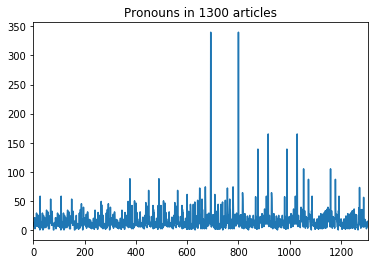

In [88]:
data_filled['pronouns'].plot()
plt.title('Pronouns in 1300 articles')

In [89]:
data_filled.shape

(1306, 18)

In [ ]:
data_filled.head()

In [90]:
data_filled = data_filled.sort_values(['nouns'],ascending=False)

In [54]:
test = data_filled[data_filled['Unnamed: 0'] == 692]['content']

In [59]:
print('Fans are known to show their admiration for stars in touching ways, and this time around, a fan travelled all the way from Hairdwar to Mumbai. The only difference is that he did so on a bicycle. The fan also brought along a framed photo of Akshay and Ganga jal from Haridwar. Akshay Kumar shares glimpses of his upcoming projects in 2017 Akshay Kumar is going to have a packed 2017 with four movies - 'Jolly LLB 2', 'Toilet Ek Prem Katha', '2.0' and 'Padman' - lined up for release. Akshay was so touched by the gesture, that he willingly obliged his fan with pictures and took a seat on his bicycle. The 'Rustom' star also posted the picture on his social media profile, but also cautioned his fans, 'This guy came from Haridwar on a cycle to meet me but it's not advisable. Love you'll for all the love but request you'll not to do this' No matter how moved, Akki made it a point to advise other fans not to pull off something like this as it could be dangerous for them. Akshay Kumar: Lesser known facts 138 Akshay Kumar to play this real-life hero in Twinkle Khanna‚Äôs maiden production If you have read Twinkle Khanna‚Äôs latest book ‚ÄòThe Legend of Lakshmi Prasad‚Äô, you may remember the story of a man who made low-cost sanitary pads for rural women. Now, her husband Akshay Kumar is all set to bring the story to life on the big screen. In Twinkle‚Äôs maiden production venture that will be directed by R Balki, Akshay will essay the role of Arunachalam Muruganantham, who found a way to make cheaper sanitary napkins that could be afforded by women in his village. When he saw that his wife uses filthy rags during her menstruation because she couldn‚Äôt afford expensive sanitary napkins, Muruganantham took it upon himself to design experimental pads. Initially ridiculed and even shunned by his family and village, his low-cost sanitary napkins have now made a huge difference to the lives of rural women. After narrating this real-life incident in her collection of short stories, Twinkle thought it would make for an inspiring film. While the concept will be hers, the story will be fleshed out by director R Balki. Akshay, whose films like ‚ÄòAirlift‚Äô, ‚ÄòSpecial 26‚Äô and ‚ÄòRustom‚Äô were inspired by true events, will add another real-life story to his filmography. Akshay Kumar: I've always been a gay icon Akshay Kumar is very happy that he got to play a gay character in Varun Dhawan-John Abraham starrer ‚ÄòDishoom‚Äô and is glad to finally having got the opportunity to play a gay character on screen. Talking about the experience, the actor told a daily that he had always been a gay icon since long and he is glad he finally got to return the love. Revealing his shooting experience, Akshay said that he took turns sitting on the laps of Varun Dhawan and John Abraham but regrets that the role was a small one as he would have hung out with those beef cakes forever! Scroll down to know more about the actor... Akshay Kumar turns mentor for 'Airlift' actress Feryna Wazheir Akshay Kumar has been a source of inspiration and a mentor to many of his co-stars in the past like Katrina Kaif and Jacqueline Fernandez. Following the same, one-film-old actress Feryna Wazheir is the newest actor who Akki has decided to take under his wings. The 'Rustom' actor has asked the 29-year-old to take tutorials in Hindi and classical dance. Speaking about the same to The Times Of India, Feryna shared, "Akshay was and has been a great mentor. He was one of the first few to tell me that I have the potential and should hone my language and dancing skills. Look at Katrina, Lisa, and to a very large extent, even Jacqueline. Akshay is a star maker and has proved it. He even put me on to a few people who helped me understand and speak Hindi fluently. The classical dance class is yet to start." Looks like another Bollywood star is in the making by Khiladi Kumar yet again. By Shreya Thakur Here's why Rajiv Bhatia became Akshay Kumar! Actors changing their real names is nothing new. Right from Yusuf Khan who became Dilip Kumar to Abdul Rashid Salman Salim Khan who became Salman Khan, actors love to have a more suitable screen name. One such actor who changed his real name is Rajiv Bhatia, who we all know today as superstar Akshay Kumar. However, there is an interesting story behind Rajiv Bhatia becoming Akshay Kumar. For those not in the know, Akshay actually made his Bollywood debut with a 10-second cameo in a Mahesh Bhatt directorial titled 'Aaj' wherein he played a Martial Arts instructor by the name Akshay. Rajiv loved the name so much that he decided to be known to the world as Akshay Kumar and adapted it as his screen name. And that's how Bollywood got it's very own Khiladi, Akshay Kumar. One thing we can't deny is that the name Akshay suits his personality and goes perfectly with his 'action star' image. Don't you agree guys? Look who got invited to Asin's wedding reception first ‚ÄòAll Is Well‚Äô actress Asin married Micromax Mobiles co-founder, Rahul Sharma, in January and guess who got the first invite for the wedding reception held on January 23, 2016. It‚Äôs Akshay Kumar who has been chosen as the best man for the nuptials. The actor was behind Asin and Rahul‚Äôs union and rightly holds the title of their best man. Well, he surely deserves the first invite. Asin shared the picture of the wedding invite on her Instagram handle with the caption, ‚ÄúThe best man at the wedding obviously gets the first card of the Wedding reception @Akshaykumar#ARwedding #MumbaiMainInvite #Bestiegetsfirstdibs.‚Äù Akshay too shared the picture of the invite with the caption, ‚ÄúHappy to receive the 1st wedding reception card of 2 of my close friends,Rahul & Asin. Wishing you both happiness always.‚Äù And it‚Äôs not just Asin who is very fond of Akshay, know who referred him for ‚ÄòRobot 2‚Äô‚Ä¶ Amy Jackson referred Akshay Kumar for 'Robot 2'? Amy Jackson sure seems to be a popular face in the South Indian film industry. According to a 9xe Spotboye report, when filmmaker Shankar was wondering whom to cast alongside Rajinikanth in 'Robot 2', it was Amy who went ahead and suggested Akshay Kumar‚Äôs name. The report goes on to state that a year ago, Akshay has helped Amy bag the leading lady‚Äôs part in 'Singh Is Bliing'. Well, this lady sure knows how to return favours. Meanwhile, Akshay Kumar has confessed that he is scared of his wife. Click on the next slide to know more... Akshay Kumar: Lesser known facts Revealed: Akshay Kumar is scared of his wife According to report on Bollywoodlife.com Akshay Kumar is out to promote his film Singh Is Bliing where he is paired with Amy Jackson. The report claimed that during a media interaction Akki seemed to be in a tell-all mood and that it is usually the accepted form of behaviour for Bollywood celebrities to be cordial with each other and it is very rare that any actor or filmmaker voices an opinion that will offend their colleagues; however, Twinkle Khanna is loved for her directness and her dare-devil attitude. The report stated that a few days ago during the launch of Twinkle‚Äôs book, Aamir Khan had disclosed that while everyone had different abilities, Twinkle was most talented in insulting people. The perfectionist actor emphasised that Twinkle was an expert in insulting people. He further revealed that all through his life, since the time he has known her, she had constantly insulted him. Allegedly, this honesty in his wife had gotten Akshay worried. It has been reported that during the media interaction Akshay stated that he loves this quality in is wife but he is equally scared of it. Read on to know which Bollywood actors does Akshay think are fake... Akshay Kumar: Lesser known facts Doing 3-4 films a year is not taxing for Akshay Kumar Akshay Kumar says that it is not mentally draining for him to do three to four films a year since he enjoys the numerous perks associated with stardom. Asked as to whether it was mentally draining for him to switch from one film to other numerous times over a year, Akshay said that it was not at all the case and that he was completely oblivious to all that. He also said that he is not that kind of an actor who would talk about these things. He elaborated that the actors get nice air-conditioned vanity vans to sit which has fruits and dry fruits and that they get to work with lovely ladies, which is why it is not taxing. He added that only fake actors claim about getting completely drained after doing a film. Read on to know what Akshay Kumar doesn't want to talk about... Akshay Kumar: Lesser known facts What Akshay Kumar does not want to talk about Akshay Kumar is a man with a golden heart. His personal interviews and humble interactions with the media are a proof of it. The Khiladi Kumar is also a philanthropist and never misses a chance to help the needy. A report on Indianexpress.com states that Akshay has donated a sum of Rs 90 lakh to drought-hit farmers in Maharashtra. The report quotes Akshay as saying that he does not want to talk about it and feels that it is stupid to do so. He further said that he felt embarrassed talking about his act of charity. Reportedly, the actor got to know about the plight of farmers through a top cop. It was then that he decided to provide financial aid to them. Read on to find out what Akshay Kumar feels about the Khans booking festivals for their film releases‚Ä¶ Akshay Kumar: Lesser known facts Akshay Kumar on Khans booking festivals for their film releases Akshay Kumar is one actor who has his kitty full with his films releasing throughout the year. From comedy to action to drama, Akshay has done it all. In a conversation with Pinkvilla.com, when asked what he has to say about Salman Khan, Shah Rukh Khan and Aamir Khan booking slots to release their films, he said that he has more releases than the festivals in India. So he doesn't take a call, but his distributors do. He further said that he would love his film to release on a festive weekend as business doubles up on festivals. Read on to know why Akshay Kumar said that it would be injustice to remake Sholay... Akshay Kumar: Lesser known facts Akshay Kumar: It will be injustice to remake 'Sholay' He modelled his last film Gabbar is Back around one of the dreaded villains of Hindi cinema in Sholay, but Akshay Kumar says it would be an injustice to remake the cult classic, which turns 40 this month. According to a PTI report, Akshay said Gabbar is Back was his way of paying a tribute to the 1975 hit, starring Amitabh Bachchan, Amjad Khan, Dharmendra, Sanjeev Kumar, Hema Malini and Jaya Bachchan. The film, directed by Ramesh Simppy, released on August 15, 1975. Asked whether he would like to play any particular role if the film was remade, Akshay said, "It will be injustice to remake Sholay. No actor can do justice to the roles played by Bachchan ji and Dharmendra ji. The film is very close to my heart and Gabbar is Back was the result of my attachment to Sholay." Read on to know Akshay‚Äôs appeal to the students of a university‚Ä¶ Akshay Kumar: Lesser known facts Akshay Kumar: Stay away from drugs Appealing to youths to stay away from drugs, actor Akshay Kumar asked them to contribute to the progress of the nation and to lead a disciplined life, reports PTI. Akshay was speaking at the premises of Lovely Professional University at Jalandhar where he was promoting his film Brothers, with co-stars Jacqueline Fernandez and Sidharth Malhotra. "The biggest hindrance to the nation's progress is drugs. Youths should always stay away from them. They can become slaves to addiction which will deter the development of the country," he said. The actor also said that he had never used any intoxicants and does not even drink tea or coffee. Read on to know how Akshay is more diplomatic than his wife Twinkle... Akshay Kumar: Lesser known facts Akshay Kumar says he's more diplomatic than wife Twinkle Khanna Akshay Kumar, who is busy promoting his upcoming film Brothers, recently stated that his wife Twinkle's book will the first book that he will read, reports Dnaindia.com. The actor was quoted in the report as saying that he has never read a book except the Balbharti textbooks in school. He further stated that he is always the first person to read Twinkle's column even before it goes for publishing, since she speaks her mind and doesn't mince with her words. After he approves, it goes for printing, the report quoted Akki. The actor reasoned saying that he does this because she keeps writing on topics from politics to religion, and he doesn't want her to get into any kind of trouble. He added that he is more diplomatic than Twinkle. While Akshay has made quite a revelation about Twinkle and him, read on to know why he is not happy with Irrfan's new AIB video... Akshay Kumar: Lesser known facts Akshay Kumar not happy with Irrfan's AIB video? While most of the audience and Bollywood celebs are amazed with the latest AIB video featuring actor Irrfan Khan, which mocks the party culture, Bollywood's Khiladi Akshay Kumar seems to be unhappy with it. A report on AbsoluteIndianews.com states that Akshay says he doesn't come from a background where people make fun of each other. He comes from a different school but it's their look out, he added. And as we all live in a free country, everyone is entitled to give their opinion, they have all the right, opined Akki. The report further mentioned that when Akshay was asked to comment on Irrfan doing the spoof, he said that he has nothing to comment. Read on to know why Akshay never worked with Karan Johar before 'Brothers' Akshay Kumar: Lesser known facts 'I never had any issues with Karan' Akshay Kumar has mostly been associated with films that are high on the action quotient. However, his upcoming film, Brothers, seems to be different. While Akshay will be fighting it out in this film too, he will be doing so in the boxing ring. Brothers has been produced under the banner of Dharma Productions. In an interview with Mid-day, when prodded as to why had it taken him so long to associate with Karan Johar, Akshay was quoted as saying that he had never had any issues with Karan Johar. He added that Karan is a close friend of his wife, Twinkle Khanna. Akshay further reasoned that they hadn't worked earlier probably because Karan had thought that he does only action films. Akshay also says that they hadn't discussed it and that there was never a fight or a cold war between them. Is Akshay all set to play a homosexual character? Read on to find out... Akshay Kumar: Lesser known facts Akshay Kumar to play a homosexual character? Rohit Dhawan's second directorial venture, Dishoom, starring brother Varun Dhawan, John Abraham and Jacqueline Fernandez is already hogging all the limelight. Now, if a Filmfare.com report is to be believed, Akshay Kumar has been approached to play a homosexual character in the film. A source close to the film was quoted as saying that Rohit considers Akshay as his lucky mascot as he was a part of his debut film, Desi Boyz, and even though he had no role in Dishoom, Rohit planned to write a special role for him. The report further stated that when Akshay heard the role he found it funny and has agreed to do it. Read on to know what was Akshay drawn to, during his recent family vacation in Europe... Akshay Kumar: Lesser known facts Akshay Kumar had left for his annual family vacation in Europe with wife Tina, son Aarav and daughter Nitara on June 13. Last year, they had explored America, this year it's the French Riviera. A source close to the actor, has been quoted in a Mumbai Mirror report as saying that, "They have just been driving through the South of France, leisurely, checking out places that catch their fancy and doing what interests them." The report further states that since Mr Khiladi is an adventure sports enthusiast, he was drawn to the Mediterranean while at Nice. Apparently, both locals and tourists, at this picturesque city along the coast, are game for a particular water sport. ‚ÄúYou clamber up a rope ladder, hang from the cords, then inch your way along the bar to the other end before jumping into the ocean and swimming back to the shore,‚Äú explains the source in the report. The source further adds that, "Akshay says this is one of the most beautiful experiences he has had. The water is cool and clean and he's just loving it." Akshay Kumar had recently posted a selfie with wife, Twinkle. Click on to the next slide to see the picture... Akshay Kumar: Lesser known facts Akshay Kumar, who is relatively new to the selfie world, has posted a picture with wife Twinkle. The actor is off on a vacation and is enjoying his free time in France. He also posted a cute caption for the picture. He wrote, " And the holiday begins...loving driving around the picturesque Antibes near Nice, great view and even better company :)" [sic] While the Khiladi explores the selfie world, read further to know how Akshay took a dig at Karan Johar... Akshay Kumar: Lesser known facts Akshay Kumar takes a dig at Karan Johar Looks like the failure of Bombay Velvet at the box office is going to haunt Karan Johar for some more time. The filmmaker, who turned an actor with Bombay Velvet, was at the receiving end when Akshay Kumar took a dig at him at the trailer launch of Brothers, reports IANS. The report stated that the Baby actor pulled Karan's leg by commenting on his role. Akki said, "Karan, just because you have worn a velvet coat today doesn't mean you are an actor." Karan, who was seated beside Akshay, looked embarrassed and replied, "Why are you throwing salt on someone's wounds?" Akshay then joked, "I was mum all this while, but you provoked me to say this." While at the launch, Akshay was at his comic best. Read further to know what he did after completing the second schedule of Singh Is Bling... Akshay Kumar: Lesser known facts Akshay Kumar has once again teamed up with Prabhu Dheva for Singh is Bling. After the success of Rowdy Rathore, the duo are set to entertain their fans once again. Akshay recently finished the second schedule of the film in Goa and took to Instagram to post a picture along with the caption, "And it's a wrap for the 2nd schedule of #SinghIsBliing! Bidding goodbye to #Goa and these lovely ladies, thank u for your hospitality :) #SIB" [sic] While Akshay is busy with Singh is Bling, read on to know why the actor is on cloud nine these days... Akshay Kumar: Lesser known facts Akshay Kumar is riding high on the success of Gabbar Is Back. On being asked if we would ever get to see him in a multi-starrer alongside a Khan, Akshay said that though there is no bad blood between him and the three Khans (Aamir, Shah Rukh and Salman), what they lack is unity, reports Dnaindia.com. He said that he is sure none of them thinks badly of him, but at the same time, there should have been unity amongst them. While many Bollywood celebs have come forward in support of the victims of Nepal earthquake, Akshay Kumar refused to donate for the cause. Read on to know why... Akshay Kumar: Lesser known facts Several Bollywood celebs have come forward in support of the victims of Nepal earthquake. However, contrary to the rumours, Akshay Kumar won‚Äôt be donating the first day collection of Gabbar Is Back to the victims of Nepal earthquake. The actor, who is currently busy promoting the film, took to Twitter to clear the air. He tweeted, ‚ÄúHeard a rumour that I am donating #GabbarIsBack‚Äôs 1st day collections to the #NepalEarthquake victims. Firstly I am not the producer so that‚Äôs not my call to make and more importantly I don‚Äôt need to wait for the film‚Äôs release to do my bit.‚Äù [sic] Read further to know what Akshay said about acting in C-grade films... Akshay Kumar: Lesser known facts Akshay Kumar is an A-list actor and has some of the biggest films of Bollywood to his credit. However, at some point the actor has done C-grade films like Mr Bond. Akshay revealed that he considered those films also as a part of his work and was not embarrassed about acting in them, stated a report on Mid-day.com. The actor was also quoted saying that none of his films are in the cans, and that at times, he has paid money from his own pocket just to complete a film and release it. Read on to know about Akshay Kumar's interesting rickshaw ride... Akshay Kumar: Lesser known facts Akshay Kumar is busy promoting his upcoming flick Gabbar is Back. The actor, who plays the main lead along with Shruti Haasan in this film, has been receiving rave reviews for his look. Even the trailer of Gabbar is Back has generated a lot of curiosity. And Akki is ensuring the film receives its due by promoting it heavily and giving interviews. Recently, the actor posted a picture of himself along with Shruti Haasan on his Facebook account. The two were in a rickshaw and the caption read, "Sat in a rickshaw today after ages giving an interview while traveling to another interview venue with Shruti! ‚Ä™#‚ÄéGabbarIsBack‚Ä¨ ‚Ä™#‚Äépromotions‚Ä¨ in full swing!" [sic] While Khiladi Kumar's release is eagerly awaited, read on to know how the actor followed in the footsteps of Salman Khan. Akshay Kumar: Lesser known facts Akshay Kumar seems to be following the footsteps of Salman Khan and has apparently painted an entire village. The actor was shooting for Singh Is Bliing in Maloma, a village in Punjab's Sangrur district, when he decided to give the town a makeover, reported Mid-day.com. The report quoted a source saying that people in Maloma had given a warm welcome to the team and since they wanted to give something back, Akshay and the production team got together and painted the village in red, orange and yellow. Some time ago, Salman Khan had painted an entire village in Karjat, while he was shooting for Bajrangi Bhaijaan. Click further to see Akshay Kumar in a turban, shooting for Singh Is Bliing... Akshay Kumar: Lesser known facts Akshay Kumar is known for getting into the skin of his character, to play it efficiently onscreen. For his upcoming film, Singh Is Bliing, Akshay Kumar has imbibed the little traits of his Punjabi character. Take a look at this picture taken during the shoot of the film and we bet you will have a hard time guessing who's the Khiladi Kumar. Clad in a brown pathani suit, Akshay looks completely in character. Read on to know more about the special clapper that was made for Singh Is Bliing... Akshay Kumar: Lesser known facts Akshay Kumar's upcoming movie, Singh is Bliing, produced by Prabhudheva, is already making headlines. The cast and crew of the film had a special clapper made. The makers have customised the clapper for Singh is Bliing with a lot of sparkling crystals on it. Akshay Kumar unveiled the clapper on Twitter when he started shooting for the film, a few days ago. Akshay Kumar will be seen romancing Amy Jackson in the film. Reportedly, Kriti Sanon was initially signed on for the film but she opted out after the film went through numerous delays and her dates clashed with Rohit Shetty's Dilwale. Read on to know what Akshay Kumar had to say about Shahid Kapoor's dancing skills... Akshay Kumar: Lesser known facts According to a report on Bollywoodlife.com, Akshay Kumar is all praise for Shahid Kapoor. The 47-year-old actor said that he would not call himself a dancer, Shahid is a dancer. The report further quoted Akshay saying that Shahid pushes himself and lets his choreographers lead him wherever they want to take him. He is a proper dancer who has learnt the art from a very young age and knows his stuff. In today's competitive world, it‚Äôs rare to find Bollywood stars praising other actors. But Akshay has always managed to do things that other Bollywood stars don't usually do. Read on to know more about the time when Akshay auctioned his personal items to raise funds for a voluntary organisation... Akshay Kumar: Lesser known facts According to a Mid-day report, Akshay Kumar is all set to auction his personal items to raise funds for a voluntary organisation working for children. Earlier this month, Akki had joined hands with entrepreneur Raj Kundra to launch a home-shopping channel on which he will now auction his personal items. A source has been quoted in the report as saying that Akshay had come up with the idea while discussing the project and the team had agreed that Akshay's personalised items will fetch a good price. The proceeds of the profit will go the NGO which works for orphan kids. Raj Kundra has also confirmed the development in the report and has been quoted as saying that if they get a good response, they will put out new things for auction every month. He also added that if the plan was a success then they would get more actors on board and encourage them to auction their belongings for charity. Akshay Kumar is a philanthropist. Read on to know how he made Women's Day special... Akshay Kumar: Lesser known facts Akshay Kumar gave the fairer sex a special gift on Women‚Äôs Day. The martial art specialist has come forward to teach self defense to women, free of cost. With the support of Aaditya Thackeray, Akshay Kumar has started teaching the art of protection to women. Not only this, visually-impaired girls are also a part of these special classes. Confirming the news, Akshay‚Äôs wife, Twinkle Khanna, tweeted, ‚ÄúSelf-defence center 4 women-no fees-by @akshaykumar & @AUThackeray -2000 women already finished training #Welldone.‚Äù But the Baby star wasn‚Äôt born a celebrity. Know how he changed his name and juggled between various jobs before making it big in Bollywood. Akshay Kumar: Lesser known facts Akshay Kumar: Lesser known facts Akki's real name is not Akshay Kumar. He was born Rajiv Hari Om Bhatia but changed his name to enter Bollywood. Akshay, who was born in Amritsar, lived in Delhi before moving to Mumbai. He later went to learn martial arts in Bangkok where he learnt Muay Thai. He also holds a black belt in Taekwondo. Before Akshay made his debut with Saugandh in 1991, he was a trained martial artist and even served as a chef and waiter in Bangkok. On his return from Bangkok, Akshay started teaching martial arts and that was when a student noticed him and asked him to try for modelling. His entry into cinema was also accidental. Once, when Akshay was on his way for an ad shoot to Bangalore, he missed his flight and ended up at a film studio with his portfolio. That evening itself, Akki got selected to play a lead role in Deedar. Akshay Kumar: Lesser known facts Very few know that the actor made a brief appearance in the Mahesh Bhatt's Aaj starring Kumar Gaurav. He played a martial arts instructor in that film. In spite of his physique, the actor loves to gorge on the fattening fruit Mango and loves home made Punjabi food and Thai cuisine. Is said to be a stickler for discipline and is a fitness freak. His passion for martial arts led him to host a documentary for National Geographic Channel titled Seven Deadly Arts with Akshay Kumar. Akshay Kumar: Lesser known facts He won the prestigious Rajiv Gandhi Award in 2004 for his outstanding contribution to cinema. He also has an Honorary Doctorate of Law from the University of Windsor, which was bestowed upon him in 2008. He received this honour for his contribution to cinema and social work. Although he won a Filmfare for Best Villain in 2001 for his role in Ajnabee and a Filmfare for Best Comic Actor for Garam Masala, he's never won a Filmfare for Best Actor till date. Akshay Kumar: Lesser known facts He has worked in eight Khiladi films-'Khiladi', 'Main Khiladi Tu Anari', 'Sabse Bada Khiladi', 'Mr. and Mrs. Khiladi', 'Khiladiyon Ka Khiladi', 'International Khiladi' and 'Khiladi 420' and Khiladi 786. In Khiladiyon Ka Khiladi, he almost broke his neck and back when he lifted WWF champion Undertaker who weighed 350 pounds! Akshay is a fan of WWE Superstar Kane whom he met at his house in Mumbai in 2010. Akshay Kumar: Lesser known facts Had a Casanova image in Bollywood and allegedly dated most of his co stars including Ayesha Jhulka, Shilpa Shetty, Raveena Tandon and Twinkle Khanna. Was a huge fan of later superstar Rajesh Khanna who also happened to be his father in law as Akki finally tied the knot with Twinkle. Akshay Kumar: Lesser known facts Amongst his favourite actors, Akki likes the work of Jackie Chan, Amitabh Bachchan and Danny Denzongpa and his favourite film is said to be Life is Beautiful. Is said to be a big fan of Ayurvedic medicines. His best friends are said to be builder Vicky Oberoi and Ajay Virmani, both of whom are not from the industry. When Akshay started his career, he faced competition from contemporaries like Awinash Wadhavan, Ronit Roy, Kamal Sadanah, Prithvi and Ravi Behl but only Ronit Roy remains in the limelight today for his work on Television and in cinema. Is a self confessed fan of late superstar Rajesh Khanna and incidentally, the actor ended up marrying his daughter Twinkle. Like Amitabh Bachchan, Akshay was one of the few Indian celebrities invited for the Olympics torch-bearer rally.(Canada). Akshay Kumar: Lesser known facts Akki's favourite holiday destinations include Bangkok, Goa and Canada and the actor is often in the news for taking a family vacation to Goa. Was the original choice for films like Phool Aur Kaante and Water. The roles eventually went to Ajay Devgn and John Abraham.')

SyntaxError: invalid syntax (<ipython-input-59-8b4a6014d45a>, line 1)

In [91]:
data_sub = data_filled[4:]

In [72]:
data_sub.to_csv('Unrest_data_ner_pos_counts_sub.csv')

In [94]:
data_sub = pd.read_csv('Unrest_data_ner_pos_counts_sub.csv')

In [95]:
data_sub.head()

,Unnamed: 0,Unnamed: 0.1,lat,lon,Date,filename,content,sentiment_compound,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_textblob,"names,orgs",location,temporal_tags,verbs,nouns,proper_nouns,pronouns
0,186,186,19.075984,72.877656,1/19/17,1-19-2017_article505.txt,"In October 2016, a Mumbai builder who runs a b...",0.7894,0.081,0.838,0.082,0.073654,51,15,NaN,47,406,130,31
1,291,291,19.075984,72.877656,1/19/17,1-19-2017_article505.txt,"In October 2016, a Mumbai builder who runs a b...",0.7894,0.081,0.838,0.082,0.073654,51,15,NaN,47,406,130,31
2,377,377,9.970237,76.281545,1/20/17,1-20-2017_article4.txt,"Stop Moral Policing, Principal, Does Maharaja'...",0.9966,0.068,0.822,0.110,0.072176,43,0,NaN,68,301,78,88
3,490,490,9.970237,76.281545,1/20/17,1-20-2017_article4.txt,"Stop Moral Policing, Principal, Does Maharaja'...",0.9966,0.068,0.822,0.110,0.072176,43,0,NaN,68,301,78,88
4,269,269,19.117282,72.925320,1/19/17,1-19-2017_article677.txt,Real estate industry has high expectation from...,0.9981,0.018,0.864,0.118,0.109314,5,5,NaN,49,285,62,16


Text(0.5,1,'Pronouns in 1296 articles')

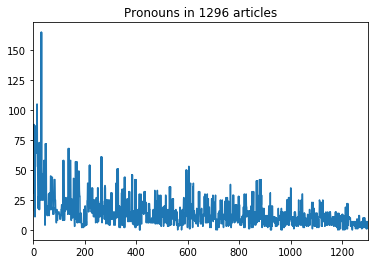

In [101]:
data_sub['pronouns'].plot()
plt.title('Pronouns in 1296 articles')